# Correlation window size
The bundling score is based on the spatial correlations of the nematic tensor. Correlations are computed in a certain window, that needs to be less than half of the image size.

With a larger window, one will be able to compute correlations between points that are farther away one from another. As a counterpart, this will increase noise in the bundling score.

A way to chose a good window size can be to compute the bundling score for a range of window size from 1 to half the size of the cropped image. We can see that the bundling score increases with the window size, but at some points drops and becomes noisy. One should chose a window size before the first drop. For example, below, there is a drop in the red curve around 35px, so one could go until 35px.

This should be done on a timelapse with a variety of bundling scores, to explore different levels of noise.

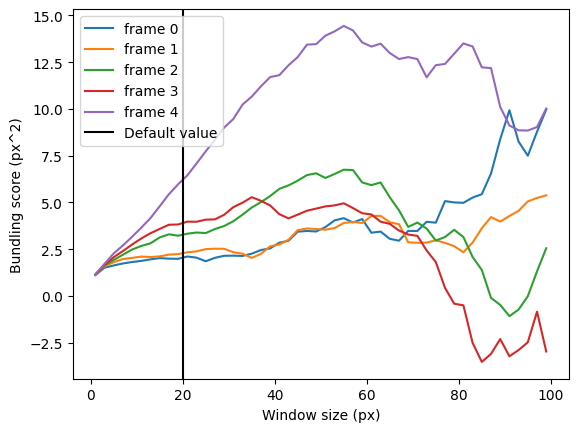

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from read_roi import read_roi_zip

import bundling_score.tools as bt
import bundling_score.bundling_score as bs

example_file = 'img/source/2021_12_15_2_GFP6-2.tif'
roi_file = 'img/source/sub_2021_12_15_2_GFP6-2.tif.zip'

ic = io.MultiImage(example_file, dtype=float)
roi = read_roi_zip(roi_file)

timelapse = ic[0] # Only one timelapse
timelapse = timelapse.astype(float)
timelapse = bt.crop_fiji_roi(timelapse, roi)
    


# The first image had a low bundling score and the last image a high score
windows = np.arange(1, 100, 2, dtype=int)
for i, image in enumerate(timelapse):
    scores = []
    for smax in windows:
        scores.append(bs.compute_score(image, smax))
    plt.plot(windows, scores, label =f'frame {i}')

#plt.xscale('log')
#plt.yscale('log')
plt.axvline(20, color='k', label='Default value')
plt.xlabel('Window size (px)')
plt.ylabel('Bundling score (px^2)')
plt.legend()